# Project : Market Positioning of Mobile


# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read The Data Using Pandas

In [ ]:
mydata=pd.read_csv('Mobile_data.csv')
mydata

battery_power  clock_speed  fc  ...  sc_w  talk_time  price_range
0               842          2.2   1  ...     7         19            1
1              1021          0.5   0  ...     3          7            2
2               563          0.5   2  ...     2          9            2
3               615          2.5   0  ...     8         11            2
4              1821          1.2  13  ...     2         15            1
...             ...          ...  ..  ...   ...        ...          ...
1995            794          0.5   0  ...     4         19            0
1996           1965          2.6   0  ...    10         16            2
1997           1911          0.9   1  ...     1          5            3
1998           1512          0.9   4  ...    10         19            0
1999            510          2.0   5  ...     4          2            3

[2000 rows x 15 columns]

# Prepare and analyse data, treat outliers and missing values

# Exploratory Data Analysis (EDA)

# Check the Datatype

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


The Dataset Consists of Integer and Float Datatype

# Describe The Dataset

In [ ]:
mydata.describe()

battery_power  clock_speed  ...    talk_time  price_range
count    2000.000000  2000.000000  ...  2000.000000  2000.000000
mean     1238.518500     1.522250  ...    11.011000     1.500000
std       439.418206     0.816004  ...     5.463955     1.118314
min       501.000000     0.500000  ...     2.000000     0.000000
25%       851.750000     0.700000  ...     6.000000     0.750000
50%      1226.000000     1.500000  ...    11.000000     1.500000
75%      1615.250000     2.200000  ...    16.000000     2.250000
max      1998.000000     3.000000  ...    20.000000     3.000000

[8 rows x 15 columns]

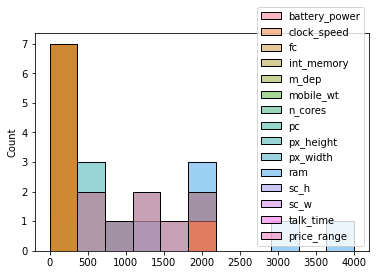

In [ ]:
sns.histplot(mydata.describe());

# Check for Null

In [ ]:
mydata.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

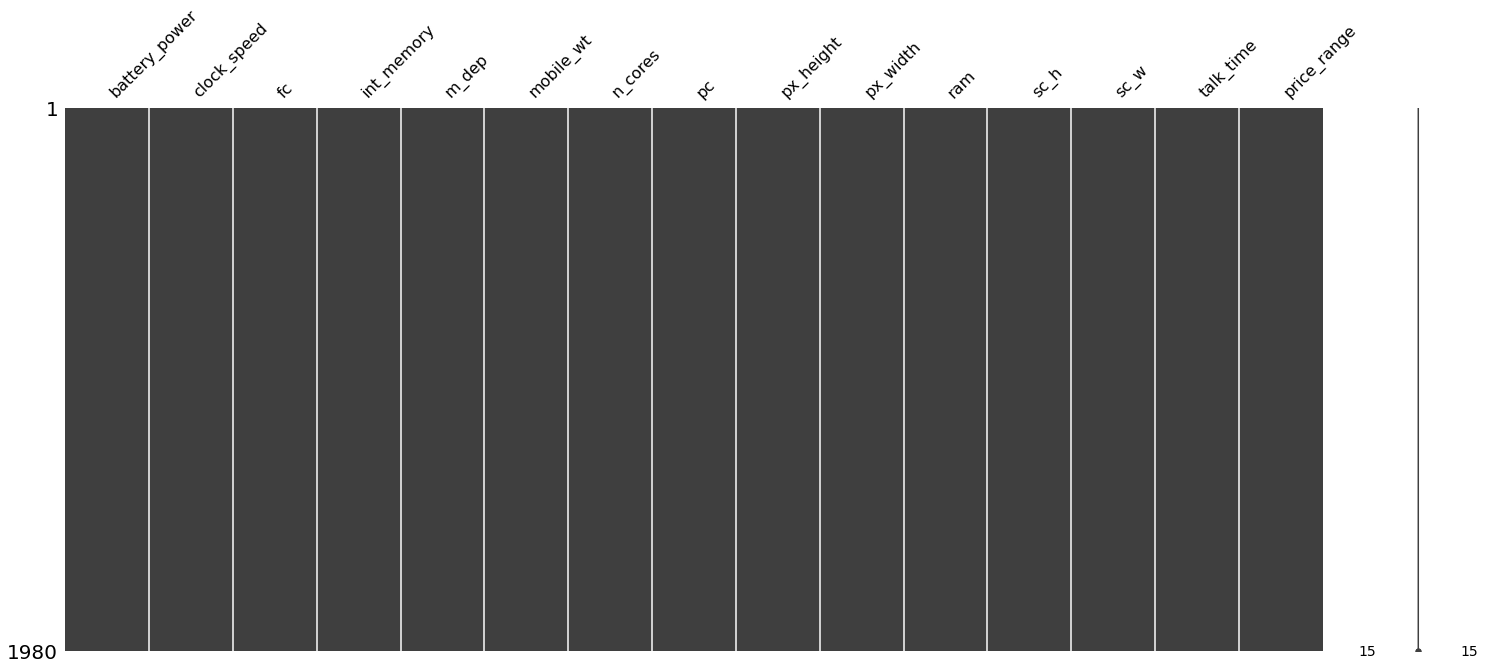

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(mydata);

No nulls Present in the Given DataSet

# Check for outliers

In [ ]:
cat_cols = mydata.select_dtypes(include = 'object')
num_cols =mydata.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')
Categorical Columns are :  Index([], dtype='object')


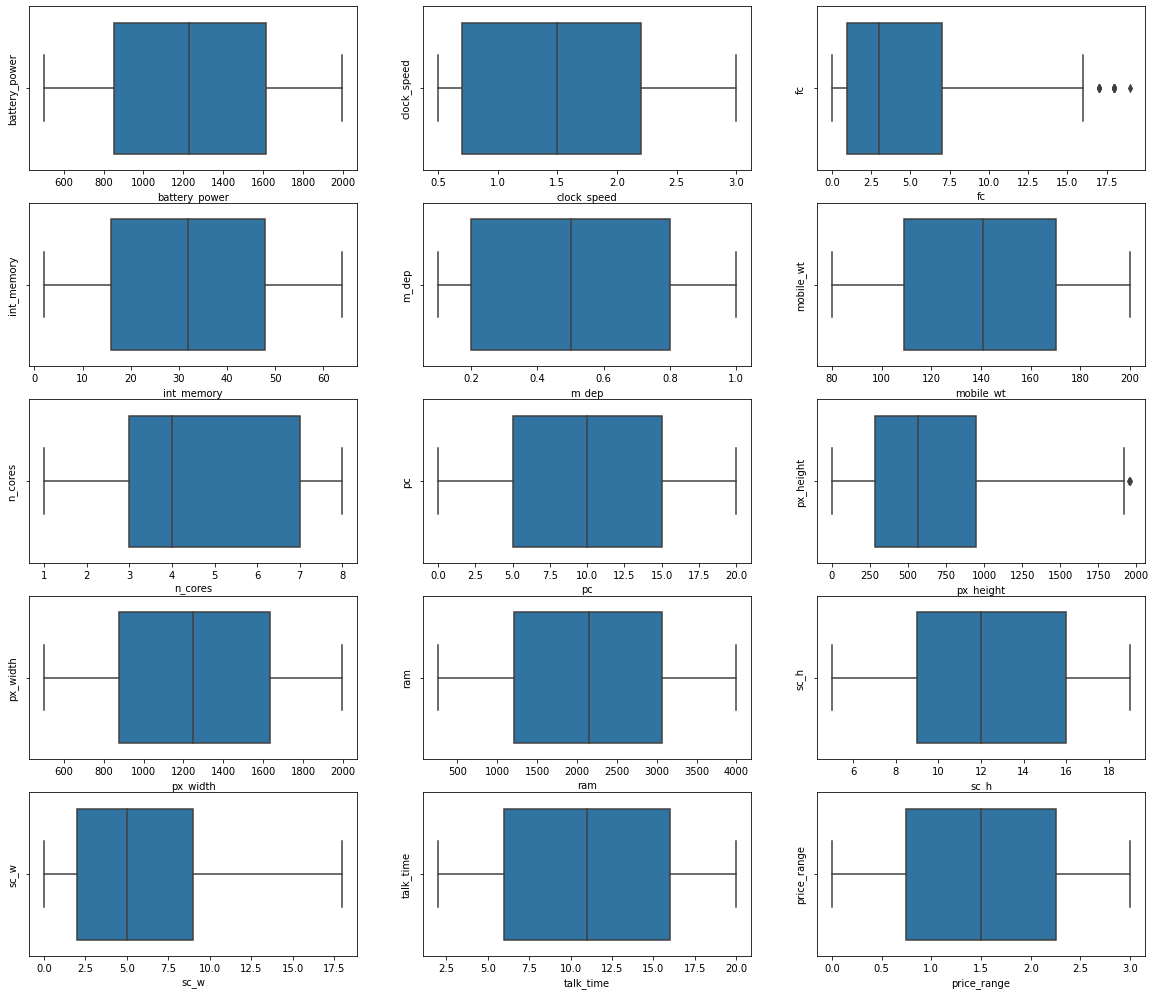

In [ ]:
plt.figure(figsize=(20,50))
for i,col in enumerate(num_cols,1):
    plt.subplot(14,3,i)
    sns.boxplot(mydata[col])
    plt.ylabel(col)
plt.show()

# Outliers present in fc and px_height, To remove Outliers

independant variable - fc

In [ ]:
out = mydata['fc']
out_Q1 = out.quantile(0.25)
out_Q3 = out.quantile(0.75)
out_IQR = out_Q3 - out_Q1
out_lowerend = out_Q1 - (1.5 * out_IQR)
out_upperend = out_Q3 + (1.5 * out_IQR)

In [ ]:
out_outliers = out[(out < out_lowerend) | (out > out_upperend)]
out_outliers

95      18
169     17
226     18
229     17
300     17
305     18
372     17
584     17
1387    18
1406    18
1416    18
1549    17
1554    18
1693    18
1705    19
1880    18
1882    18
1888    18
Name: fc, dtype: int64

independant variable - px_height

In [ ]:
out1 = mydata['px_height']
out1_Q1 = out1.quantile(0.25)
out1_Q3 = out1.quantile(0.75)
out1_IQR = out1_Q3 - out1_Q1
out1_lowerend = out1_Q1 - (1.5 * out1_IQR)
out1_upperend = out1_Q3 + (1.5 * out1_IQR)

In [ ]:
out1_outliers = out1[(out1 < out1_lowerend) | (out1 > out1_upperend)]
out1_outliers

988     1949
1771    1960
Name: px_height, dtype: int64

# Outliers of the Dataset:

In [ ]:
mydata[95:1889]

battery_power  clock_speed  fc  ...  sc_w  talk_time  price_range
95             1137          1.0  18  ...     5         12            3
96             1355          2.3  10  ...     4          8            0
97             1665          0.5   3  ...    17         14            2
98              657          2.5   0  ...     3         18            0
99              593          0.5   6  ...     2          7            1
...             ...          ...  ..  ...   ...        ...          ...
1884           1369          1.7   3  ...    15          4            3
1885            713          0.9   0  ...    10          9            0
1886           1082          2.3  11  ...     2         17            1
1887           1719          2.1   0  ...     1         11            2
1888           1544          2.4  18  ...     4          2            0

[1794 rows x 15 columns]

# Drop the Outliers present:

In [ ]:
mydata1=mydata.drop([95,169,226,229,300,305,372,584,988,1387,1406,1416,1549,1554,1693,1705,1771,1880,1882,1888])

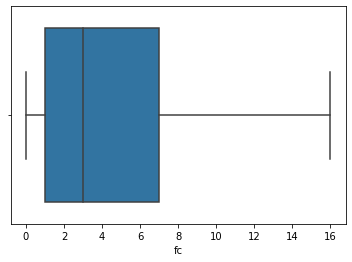

In [ ]:
sns.boxplot(x=mydata1['fc'])

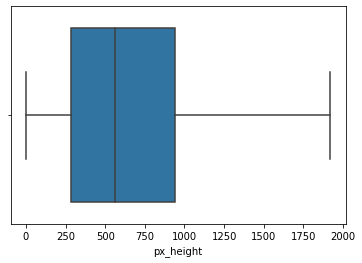

In [ ]:
sns.boxplot(x=mydata1['px_height'])

Outliers Removed in the Given Dataset

In [ ]:
mydata=mydata1

In [ ]:
mydata.shape

(1980, 15)

The Data has 1980 Rows and 15 columns

In [ ]:
mydata.describe().T

count         mean          std  ...     50%      75%     max
battery_power  1980.0  1236.402020   439.568762  ...  1224.0  1614.00  1998.0
clock_speed    1980.0     1.521162     0.817236  ...     1.5     2.20     3.0
fc             1980.0     4.189899     4.168422  ...     3.0     7.00    16.0
int_memory     1980.0    32.055051    18.126820  ...    32.0    48.00    64.0
m_dep          1980.0     0.502222     0.288722  ...     0.5     0.80     1.0
mobile_wt      1980.0   140.168182    35.385004  ...   141.0   170.00   200.0
n_cores        1980.0     4.527273     2.291263  ...     4.0     7.00     8.0
pc             1980.0     9.836364     6.023408  ...    10.0    15.00    20.0
px_height      1980.0   641.183838   439.957961  ...   561.5   942.00  1920.0
px_width       1980.0  1249.646465   431.606730  ...  1247.0  1629.25  1998.0
ram            1980.0  2125.135859  1084.556984  ...  2146.5  3066.50  3998.0
sc_h           1980.0    12.316667     4.209307  ...    12.0    16.00    19.0
sc_w           1980.0     5.773737     4.358066  ...     5.0     9.00    18.0
talk_time      1980.0    11.003535     5.458048  ...    11.0    16.00    20.0
price_range    1980.0     1.497980     1.117863  ...     1.0     2.00     3.0

[15 rows x 8 columns]

# Check the distribution of key numerical variables

# Correlation

In [ ]:
mydata_corr=mydata.corr()
mydata_corr

battery_power  clock_speed  ...  talk_time  price_range
battery_power       1.000000     0.010136  ...   0.047909     0.200763
clock_speed         0.010136     1.000000  ...  -0.010122    -0.006120
fc                  0.020317    -0.006342  ...  -0.008136     0.021120
int_memory         -0.008197     0.004461  ...  -0.010334     0.043458
m_dep               0.034834    -0.011400  ...   0.015418    -0.000925
mobile_wt           0.002575     0.011939  ...   0.010434    -0.031628
n_cores            -0.026451    -0.005638  ...   0.015609     0.008307
pc                  0.025013    -0.009017  ...   0.015342     0.033871
px_height           0.014290    -0.011326  ...  -0.011667     0.144277
px_width           -0.008205    -0.009050  ...   0.004499     0.165132
ram                -0.000121     0.004628  ...   0.011287     0.917009
sc_h               -0.023784    -0.026876  ...  -0.013949     0.025641
sc_w               -0.016533    -0.005777  ...  -0.020700     0.038076
talk_time           0.047909    -0.010122  ...   1.000000     0.020582
price_range         0.200763    -0.006120  ...   0.020582     1.000000

[15 rows x 15 columns]

# Correlogram

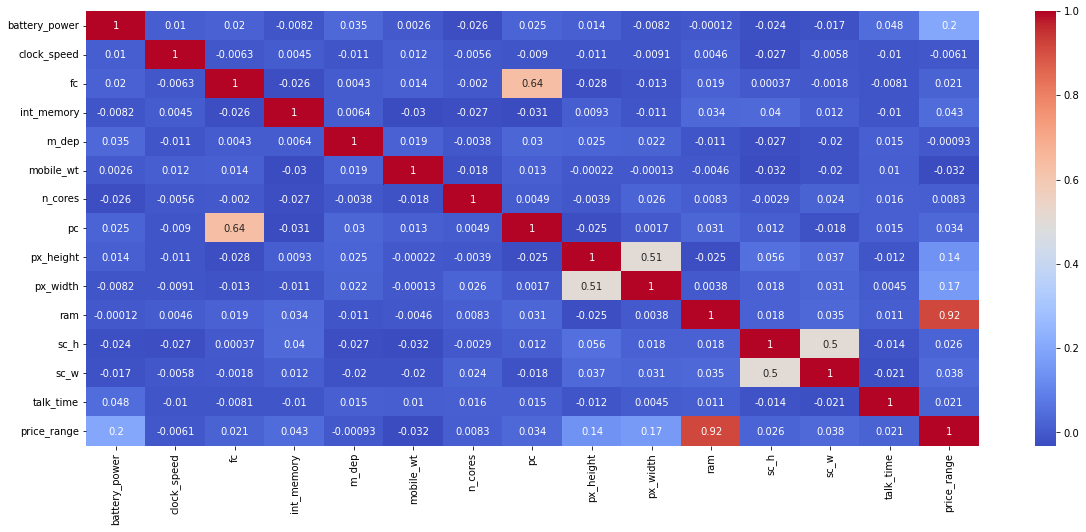

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(mydata_corr,annot=True,cmap='coolwarm')

# Visualization

# Graph 1: Pairplot is used

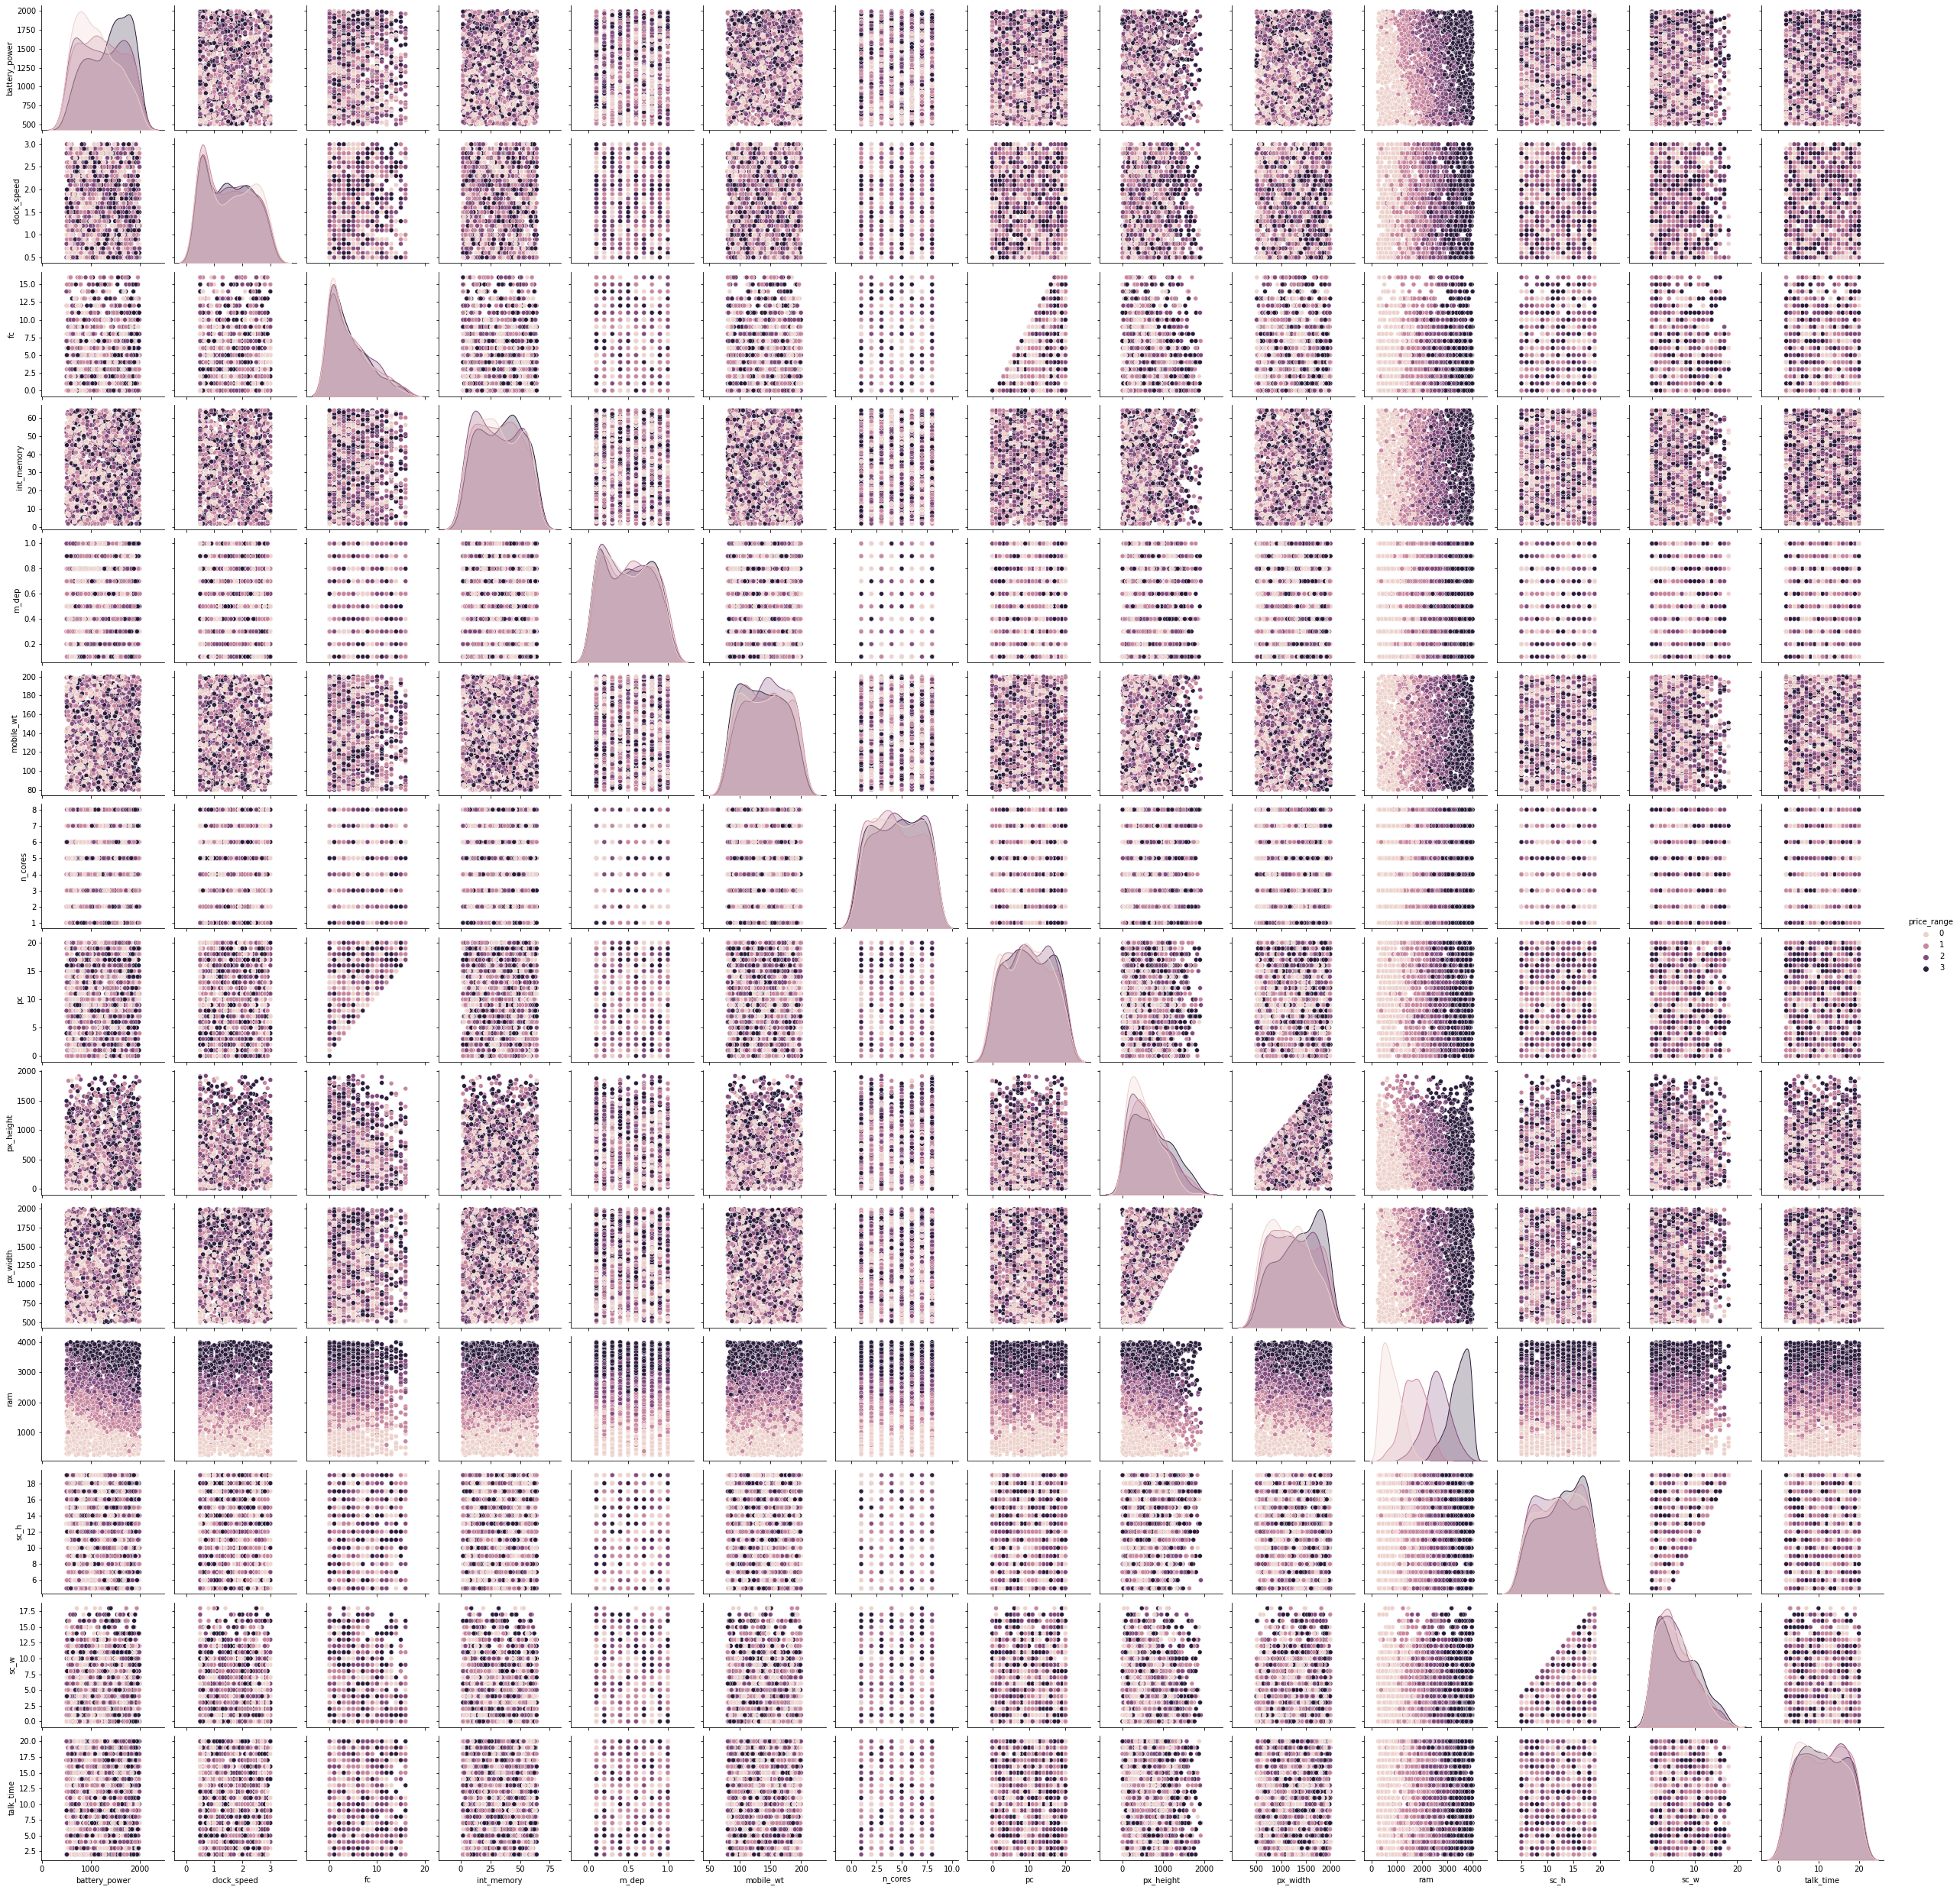

In [ ]:
sns.pairplot(mydata,kind='scatter', hue='price_range')

# Graph 2 : JointPlot is used

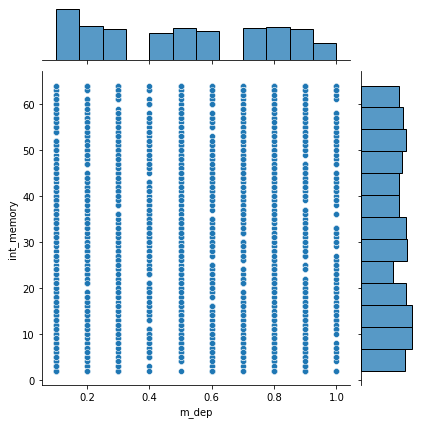

In [ ]:
sns.jointplot(x="m_dep",y='int_memory',data=mydata);

# Graph 3 : Catplot is used

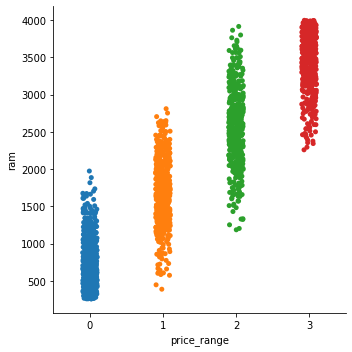

In [ ]:
sns.catplot(x='price_range',y='ram',data=mydata)

# Graph 4 : Historam Plot is used 

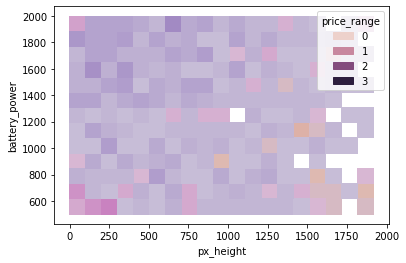

In [ ]:
sns.histplot(x='px_height',y='battery_power',hue='price_range',data=mydata);

# Graph 5 : Boxen Plot is used

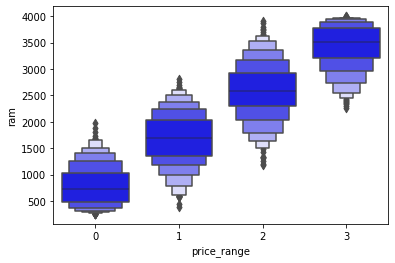

In [ ]:
sns.boxenplot(x="price_range", y="ram",color="b",scale="linear", data=mydata)

# Graph 6 : Anscombe’s quartet is used

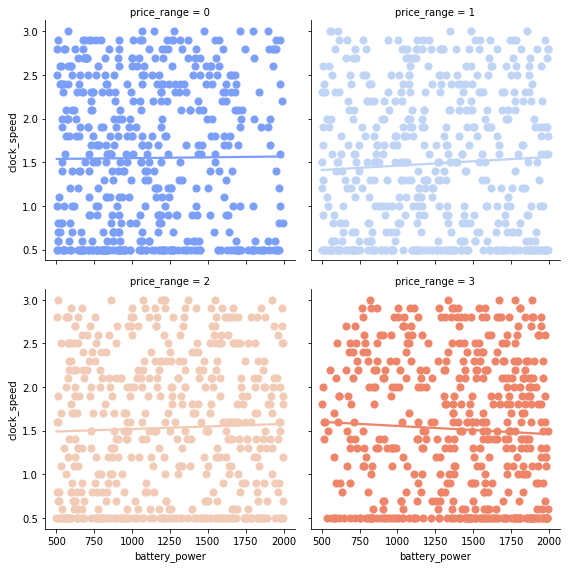

In [ ]:
sns.lmplot(x="battery_power", y="clock_speed", col="price_range", hue="price_range", data=mydata,
           col_wrap=2, ci=None, palette="coolwarm", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Graph 7 : Multiple bivariate KDE plots

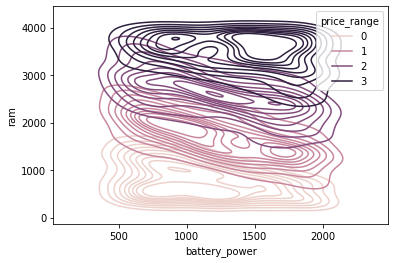

In [ ]:
sns.kdeplot(data=mydata,x="battery_power",y="ram",hue="price_range",thresh=.1)

#Plotly express

In [ ]:
import plotly.express as px
df = mydata
fig = px.scatter(df, x="ram", y="clock_speed", color="price_range",
                 title="price_range")

fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=[go.Surface(z=mydata.values)])
fig.update_layout(title='Mobile Price Range', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

# Seperating the Dependant and Independant Variables

# Dependant Variable

In [ ]:
y_dep=mydata.price_range
y_dep

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1980, dtype: int64

# Independant variable

In [ ]:
x_ind=mydata.drop('price_range',axis=1)
x_ind

battery_power  clock_speed  fc  int_memory  ...   ram  sc_h  sc_w  talk_time
0               842          2.2   1           7  ...  2549     9     7         19
1              1021          0.5   0          53  ...  2631    17     3          7
2               563          0.5   2          41  ...  2603    11     2          9
3               615          2.5   0          10  ...  2769    16     8         11
4              1821          1.2  13          44  ...  1411     8     2         15
...             ...          ...  ..         ...  ...   ...   ...   ...        ...
1995            794          0.5   0           2  ...   668    13     4         19
1996           1965          2.6   0          39  ...  2032    11    10         16
1997           1911          0.9   1          36  ...  3057     9     1          5
1998           1512          0.9   4          46  ...   869    18    10         19
1999            510          2.0   5          45  ...  3919    19     4          2

[1980 rows x 14 columns]

# Split The Dataset in to train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=7)

KNN Algorithm is based on distance, need to standartise (mean = 0 , std = 1) to standartise Standard Scaler is used

# Before Normalization

# x_train

In [ ]:
cat_cols = mydata.select_dtypes(include = 'object')
num_cols =mydata.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')
Categorical Columns are :  Index([], dtype='object')


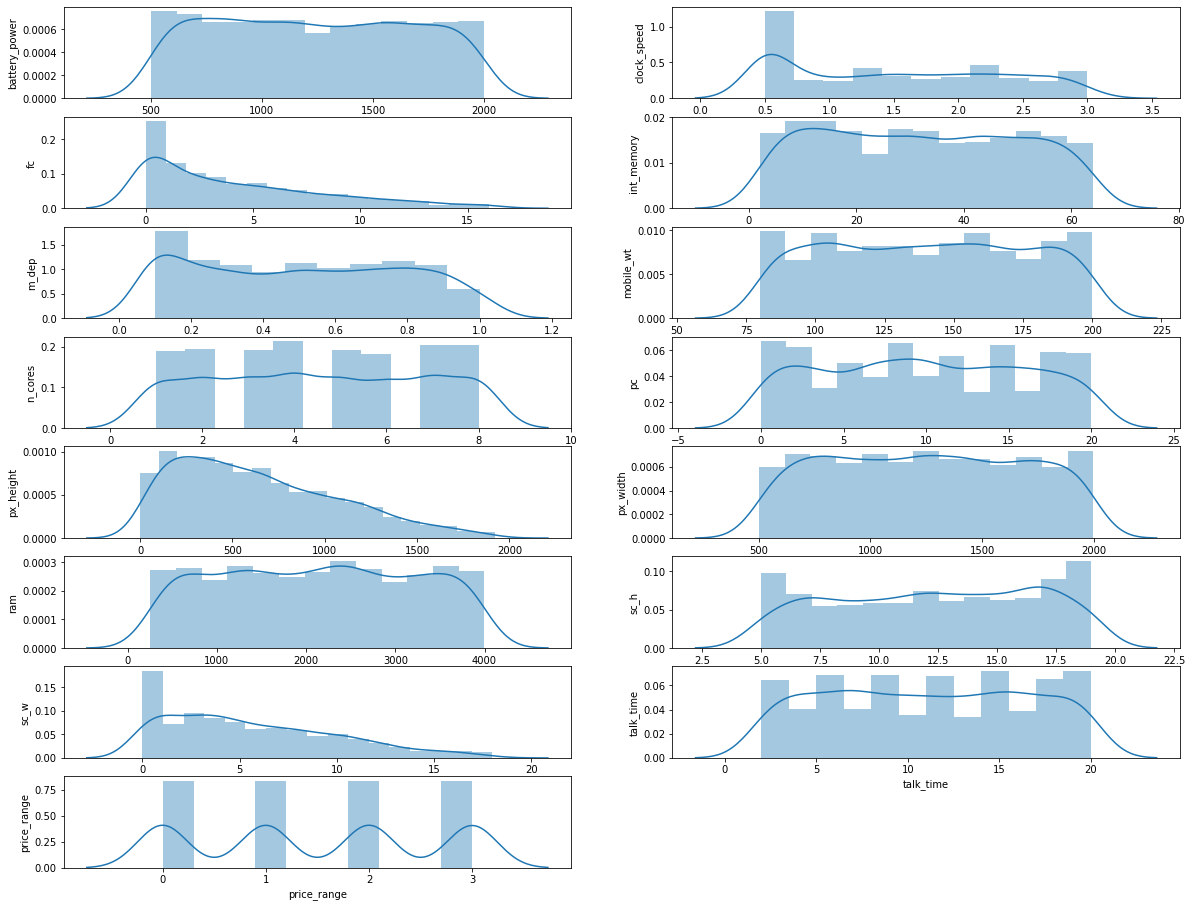

In [ ]:
plt.figure(figsize=(20,30))
for i,col in enumerate(num_cols,1):
 plt.subplot(15,2,i)
 sns.distplot(mydata[col])
 plt.ylabel(col)
plt.show()

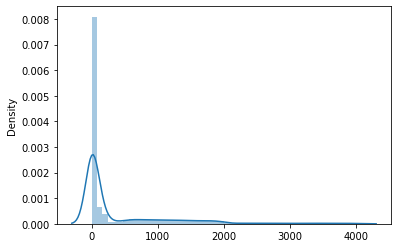

In [ ]:
sns.distplot(x_train)

# x_test

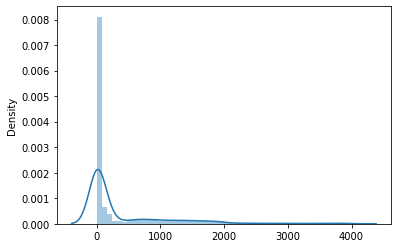

In [ ]:
sns.distplot(x_test)

#Quantitave test for normality check

In [ ]:
 from scipy.stats import anderson

In [ ]:
for i in num_cols:
 print([i])
 a=anderson(mydata[i],dist="norm")
 print(a)
 if a[0] > a[1][2]:
   print("Reject the null hypothesis",a[2][2],"% significant level")
 else:
   print("Failed to reject the null hypothesis") 

['battery_power']
AndersonResult(statistic=24.140828764404887, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Reject the null hypothesis 5.0 % significant level
['clock_speed']
AndersonResult(statistic=51.51664389988969, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Reject the null hypothesis 5.0 % significant level
['fc']
AndersonResult(statistic=76.18087604502534, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Reject the null hypothesis 5.0 % significant level
['int_memory']
AndersonResult(statistic=24.0164271179533, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Reject the null hypothesis 5.0 % significant level
['m_dep']
AndersonResult(statistic=42.56348545601895, critical_values=array([0.575, 0.655, 0

#Normalization

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()


In [ ]:
x_norm=norm.fit_transform(x_train)
x_norm

array([[-0.34964089,  0.2241521 , -0.14205338, ...,  0.42752759,
        -0.23115869, -0.09840373],
       [ 0.37037327, -0.3160508 , -0.25565834, ..., -0.19700572,
        -0.33472565, -0.37042756],
       [ 0.18360408, -0.44948217, -0.36359303, ...,  0.06120817,
         0.02217437,  0.52615115],
       ...,
       [-0.28113863, -0.28667478, -0.23189563, ...,  0.2567704 ,
         0.4378178 ,  0.04176119],
       [-0.02246456, -0.23605178, -0.01792108, ..., -0.46500441,
        -0.40532438,  0.2711505 ],
       [ 0.45422678, -0.0751123 , -0.28296562, ...,  0.11405599,
         0.14650229,  0.46069304]])

In [ ]:
x_norm1=norm.fit_transform(x_test)
x_norm1

array([[ 9.85373197e-02, -3.00224145e-01, -2.93055265e-01, ...,
         3.90332637e-02,  3.38634033e-01, -4.39314374e-01],
       [-2.50560316e-02, -2.04628032e-01,  1.81041356e-01, ...,
         2.90811662e-01,  4.84103384e-01,  2.46680488e-01],
       [ 7.13627608e-02, -2.39953767e-01, -3.66601865e-01, ...,
        -4.02785014e-02, -1.62052872e-01,  2.06326184e-01],
       ...,
       [-3.34533956e-01,  5.15558951e-02, -2.47117407e-01, ...,
         1.53045339e-01,  3.56049224e-03,  1.16971796e-04],
       [ 3.70419384e-01, -3.41430994e-01, -2.68614684e-01, ...,
        -2.90674990e-01,  6.51746254e-02,  1.51178289e-01],
       [-4.35361008e-02,  2.01377961e-01,  1.09090964e-01, ...,
         1.51141122e-01,  4.49088040e-01,  2.74582514e-01]])

#Creating dataframe with x_norm

In [ ]:
mydata.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [ ]:
x_scaled = pd.DataFrame(x_norm,columns=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'])

In [ ]:
x_scaled1 = pd.DataFrame(x_norm1,columns=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'])

In [ ]:
cat_cols = x_scaled.select_dtypes(include = 'object')
num_cols =x_scaled.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')
Categorical Columns are :  Index([], dtype='object')


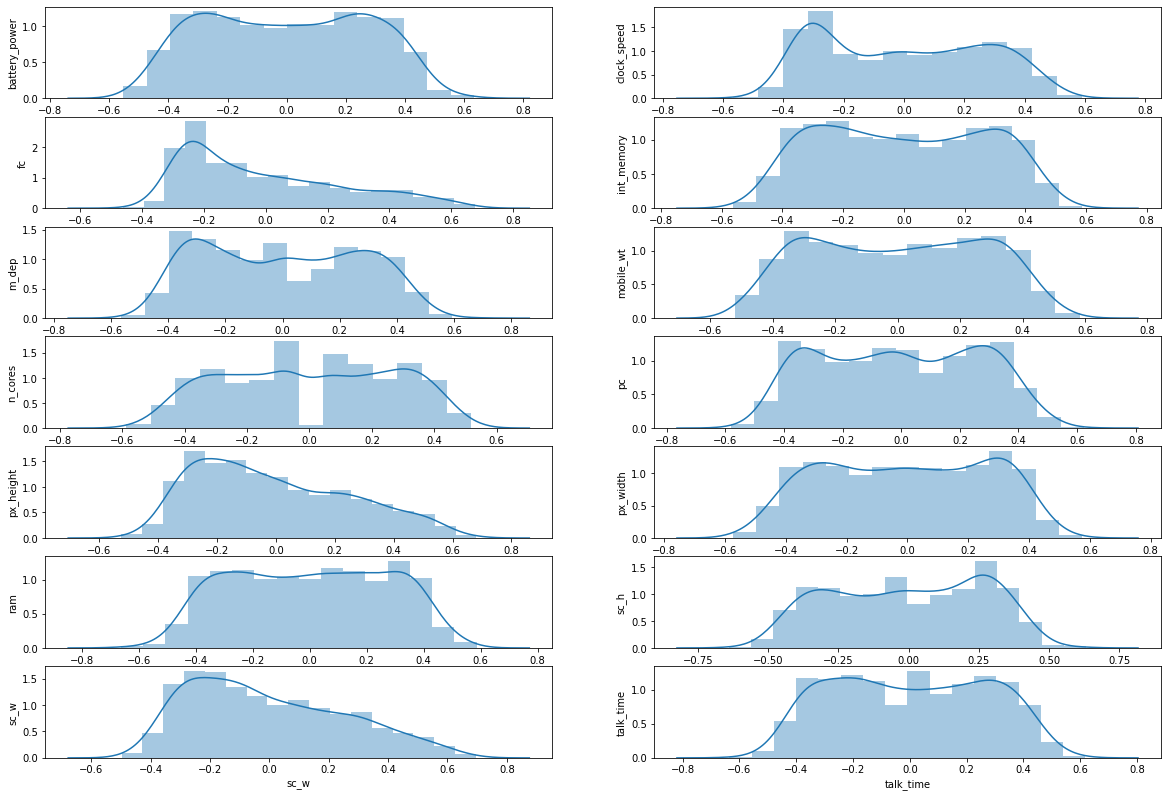

In [ ]:
plt.figure(figsize=(20,30))
for i,col in enumerate(num_cols,1):
 plt.subplot(15,2,i)
 sns.distplot(x_scaled[col])
 plt.ylabel(col)
plt.show()

# After Normalization

# x_train

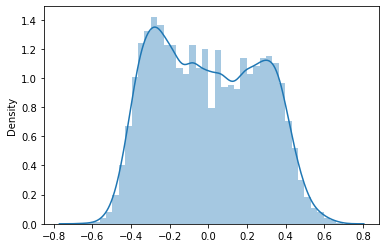

In [ ]:
sns.distplot(x_norm)

# x_test

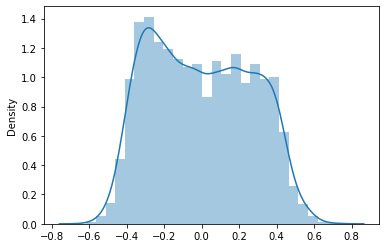

In [ ]:
sns.distplot(x_norm1)

# Training a KNN with data and check it’s performance

In the Given Dataset,the dependant variable is in Categorical, Classifier is used

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
mydata.shape

(1980, 15)

# Square Root Method

In [ ]:
np.sqrt(1980)                                              #We have 1980 rows in the Dataset

44.49719092257398

# Create the Model

In [ ]:
model=KNeighborsClassifier(n_neighbors=43,p=4,metric='manhattan')           #sqrt value 44.49719092257398 take a odd num as 43

# Fit the Model

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=43, p=4)

# Machine Prediction

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([3, 1, 2, 0, 0, 0, 0, 1, 1, 3, 2, 2, 1, 1, 1, 2, 3, 0, 1, 3, 2, 2,
       0, 2, 0, 0, 3, 3, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 0, 1,
       2, 3, 1, 0, 0, 2, 3, 0, 1, 3, 2, 1, 0, 3, 1, 1, 0, 0, 1, 3, 1, 3,
       0, 3, 1, 2, 3, 2, 1, 0, 3, 1, 2, 2, 2, 3, 0, 2, 0, 1, 2, 3, 2, 3,
       2, 0, 0, 3, 0, 0, 1, 3, 0, 1, 0, 2, 2, 1, 3, 3, 3, 2, 2, 1, 1, 2,
       1, 1, 0, 1, 3, 1, 0, 1, 0, 3, 2, 3, 1, 2, 0, 2, 1, 0, 2, 0, 3, 1,
       2, 0, 3, 0, 1, 1, 2, 3, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 3, 3, 1, 2,
       0, 2, 1, 0, 3, 3, 2, 3, 0, 2, 0, 0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 1,
       1, 0, 0, 0, 3, 3, 1, 2, 0, 3, 0, 0, 3, 0, 0, 3, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 2, 0, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 3, 3,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 2, 3, 1, 1, 1, 2, 1, 3, 1, 3, 3, 2,
       3, 1, 0, 0, 1, 3, 1, 2, 0, 1, 0, 0, 0, 0, 2, 3, 2, 3, 1, 2, 3, 3,
       3, 1, 2, 0, 2, 1, 3, 0, 0, 2, 3, 2, 2, 0, 3, 1, 2, 2, 0, 1, 1, 2,
       3, 3, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 3, 3, 2,

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[91, 23,  0,  0],
       [ 6, 64, 24,  1],
       [ 0, 13, 64, 12],
       [ 0,  0, 17, 81]])

# Acccuracy for Square Root Method

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7575757575757576

The Accuracy for Square Root Method is 0.7575757575757576 (75%)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       114
           1       0.64      0.67      0.66        95
           2       0.61      0.72      0.66        89
           3       0.86      0.83      0.84        98

    accuracy                           0.76       396
   macro avg       0.76      0.75      0.76       396
weighted avg       0.77      0.76      0.76       396



# Getting an optimized number of neighbours

# Error rate Method

In [ ]:
error_rate=[]
for i in range(1,80):                               
    knn_new=KNeighborsClassifier(n_neighbors=i)
    knn_new.fit(x_train,y_train)
    y_pred_err=knn_new.predict(x_test)
    error_rate.append(np.mean(y_pred_err != y_test))

# Plot the Error Rate Graph

Text(0, 0.5, 'Error_rate')

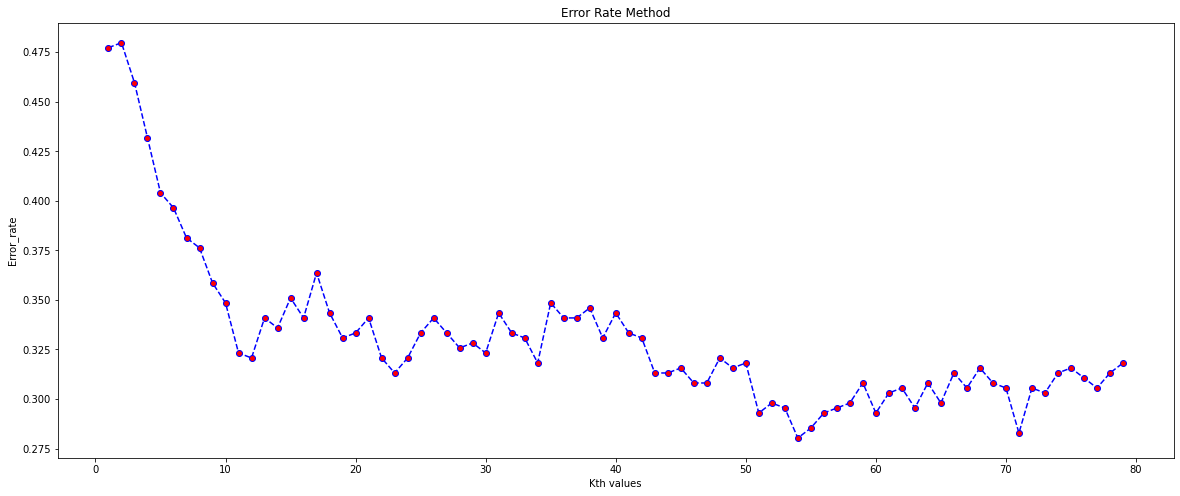

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(range(1,80),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title("Error Rate Method")
plt.xlabel('Kth values')
plt.ylabel('Error_rate')

At the Kth value of 55 we have a less Error Rate

# Create a Model for Error Rate Method

In [ ]:
model_er=KNeighborsClassifier(n_neighbors=55,p=4,metric='manhattan') 

# Fit the Model

In [ ]:
model_er.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=55, p=4)

# Machine Prediction 

In [ ]:
y_pred_er = model_er.predict(x_test)
y_pred

array([3, 1, 2, 0, 0, 0, 0, 1, 1, 3, 2, 2, 1, 1, 1, 2, 3, 0, 1, 3, 2, 2,
       0, 2, 0, 0, 3, 3, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 0, 1,
       2, 3, 1, 0, 0, 2, 3, 0, 1, 3, 2, 1, 0, 3, 1, 1, 0, 0, 1, 3, 1, 3,
       0, 3, 1, 2, 3, 2, 1, 0, 3, 1, 2, 2, 2, 3, 0, 2, 0, 1, 2, 3, 2, 3,
       2, 0, 0, 3, 0, 0, 1, 3, 0, 1, 0, 2, 2, 1, 3, 3, 3, 2, 2, 1, 1, 2,
       1, 1, 0, 1, 3, 1, 0, 1, 0, 3, 2, 3, 1, 2, 0, 2, 1, 0, 2, 0, 3, 1,
       2, 0, 3, 0, 1, 1, 2, 3, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 3, 3, 1, 2,
       0, 2, 1, 0, 3, 3, 2, 3, 0, 2, 0, 0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 1,
       1, 0, 0, 0, 3, 3, 1, 2, 0, 3, 0, 0, 3, 0, 0, 3, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 2, 0, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 3, 3,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 2, 3, 1, 1, 1, 2, 1, 3, 1, 3, 3, 2,
       3, 1, 0, 0, 1, 3, 1, 2, 0, 1, 0, 0, 0, 0, 2, 3, 2, 3, 1, 2, 3, 3,
       3, 1, 2, 0, 2, 1, 3, 0, 0, 2, 3, 2, 2, 0, 3, 1, 2, 2, 0, 1, 1, 2,
       3, 3, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 3, 3, 2,

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred_er)

array([[101,  12,   1,   0],
       [  6,  67,  22,   0],
       [  0,  12,  69,   8],
       [  0,   0,  17,  81]])

# Accuracy of Error Rate Method

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc_knn=accuracy_score(y_test,y_pred_er)
acc_knn

0.803030303030303

The Accuracy for Square Root Method is 0.803030303030303 (80%)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report1=classification_report(y_test,y_pred_er)
print(report1)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       114
           1       0.74      0.71      0.72        95
           2       0.63      0.78      0.70        89
           3       0.91      0.83      0.87        98

    accuracy                           0.80       396
   macro avg       0.81      0.80      0.80       396
weighted avg       0.82      0.80      0.81       396



# By checking with the Error rate method the optimized number of neighbours is n=55

#K Fold Cross Vectorization

In [ ]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


#Concating dataframe

In [ ]:
x_ind_ = pd.concat([x_scaled,x_scaled1],ignore_index=True)
x_ind_

battery_power  clock_speed        fc  ...      sc_h      sc_w  talk_time
0         -0.349641     0.224152 -0.142053  ...  0.427528 -0.231159  -0.098404
1          0.370373    -0.316051 -0.255658  ... -0.197006 -0.334726  -0.370428
2          0.183604    -0.449482 -0.363593  ...  0.061208  0.022174   0.526151
3          0.012570    -0.332241  0.056699  ...  0.050167 -0.322114  -0.162091
4         -0.243556    -0.276268  0.255317  ...  0.352364 -0.139482   0.161594
...             ...          ...       ...  ...       ...       ...        ...
1975       0.155823     0.087639 -0.264022  ... -0.029008  0.244829  -0.296812
1976       0.327958    -0.041912 -0.071844  ...  0.160926  0.418861  -0.097289
1977      -0.334534     0.051556 -0.247117  ...  0.153045  0.003560   0.000117
1978       0.370419    -0.341431 -0.268615  ... -0.290675  0.065175   0.151178
1979      -0.043536     0.201378  0.109091  ...  0.151141  0.449088   0.274583

[1980 rows x 14 columns]

#SVM Accuracy

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel="linear") 
svc.fit(x_norm,y_train) 
y_pred_svm=svc.predict(x_norm1)  
print('Accuracy=',accuracy_score(y_pred_svm,y_test))

Accuracy= 0.9191919191919192


In [ ]:
acc_svc=accuracy_score(y_test,y_pred_svm)
acc_svc

0.9191919191919192

In [ ]:
kernel=['rbf','poly','sigmoid']

In [ ]:
for i in kernel:
    model1=SVC(kernel=i)
    model1=model1.fit(x_train,y_train)
    print('kernel:',i)
    print('Accuracy Score:',accuracy_score(y_test,model1.predict(x_test)))

kernel: rbf
Accuracy Score: 0.8813131313131313
kernel: poly
Accuracy Score: 0.7651515151515151
kernel: sigmoid
Accuracy Score: 0.9040404040404041


#Decision Tree Classifier

In [ ]:
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
parameters={"max_depth":(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),
            'max_features':('log2','auto','sqrt'),'min_samples_split':(2,4,6)}
DT_hp=RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=parameters,cv=5)
DT_hp.fit(x_norm,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 20, 30, 40, 50, 60,
                                                      70, 100),
                                        'max_features': ('log2', 'auto',
                                                         'sqrt'),
                                        'min_samples_split': (2, 4, 6)})

In [ ]:
DT_hp.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2')

In [ ]:
from sklearn.metrics import accuracy_score
DT_model=tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2')
DT_model=DT_model.fit(x_norm,y_train)
optimum_DT_=DT_model.predict(x_norm1)
acc_decisiontree=accuracy_score(y_test,optimum_DT_)
acc_decisiontree

0.7424242424242424

#Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters={"n_estimators":(100,200,300,600,800,900),"criterion":("gini","entropy"),
            "max_features":("auto","sqrt","log2"),"min_samples_split":(2,4,6),"random_state":(0,1,2,3,4,5)}
a=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5)
a.fit(x_norm,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'n_estimators': (100, 200, 300, 600,
                                                         800, 900),
                                        'random_state': (0, 1, 2, 3, 4, 5)})

In [ ]:
a.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=4, random_state=4)

In [ ]:
from sklearn.metrics import accuracy_score
optimum_RF_model=RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=4, random_state=4)
optimum_RF_model=optimum_RF_model.fit(x_train,y_train)
optimum_RF_=optimum_RF_model.predict(x_test)
acc_randomforest=accuracy_score(y_test,optimum_RF_)
acc_randomforest

0.8914141414141414

#XG Boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
parameters={"n_estimators":(100,200,300,600,800,900),"criterion":("gini","entropy"),
            "max_features":("auto","sqrt","log2"),"min_samples_split":(2,4,6),"random_state":(0,1,2,3,4,5)}
b=RandomizedSearchCV(XGBClassifier(),param_distributions=parameters,cv=5)
b.fit(x_norm,y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'n_estimators': (100, 200, 300, 600,
                                                         800, 900),
                                        'random_state': (0, 1, 2, 3, 4, 5)})

In [ ]:
b.best_estimator_

XGBClassifier(criterion='gini', max_features='log2', min_samples_split=6,
              n_estimators=800, objective='multi:softprob', random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score
optimum_xg_model=XGBClassifier(criterion='gini', max_features='log2', min_samples_split=6,
              n_estimators=800, objective='multi:softprob', random_state=2)
optimum_xg_model=optimum_xg_model.fit(x_train,y_train)
optimum_xg_=optimum_xg_model.predict(x_test)
acc_xg=accuracy_score(y_test,optimum_xg_)
acc_xg

0.8787878787878788

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 
              'Decision Tree', 'XGBoosting Classifier'],
    'Score': [acc_svc,acc_knn, 
              acc_randomforest,acc_decisiontree,
              acc_xg]})
models.sort_values(by='Score', ascending=False)

Model     Score
0  Support Vector Machines  0.919192
2            Random Forest  0.888889
4    XGBoosting Classifier  0.878788
1                      KNN  0.803030
3            Decision Tree  0.742424

#Cross validation

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=7,shuffle = True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','KNN','Decision Tree','Random Forest']
models=[SVC(kernel='linear'),SVC(kernel='rbf'),KNeighborsClassifier(n_neighbors=9),tree.DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x_ind,y_dep, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean       Std
Linear Svm     0.973232  0.010114
Radial Svm     0.948990  0.019877
KNN            0.926263  0.018377
Decision Tree  0.828788  0.022297
Random Forest  0.884343  0.025095

#Confusion matrix of KNN

In [ ]:
confusion_matrix(y_test,y_pred_er)

array([[101,  12,   1,   0],
       [  6,  67,  22,   0],
       [  0,  12,  69,   8],
       [  0,   0,  17,  81]])

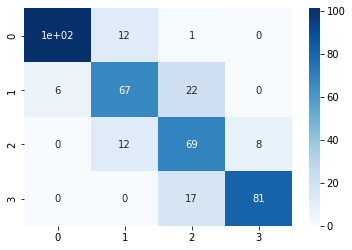

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_er),cmap='Blues',annot=True);

#Confusion matrix of SVM

In [ ]:
confusion_matrix(y_test,y_pred_svm)

array([[102,  12,   0,   0],
       [  3,  84,   8,   0],
       [  0,   0,  86,   3],
       [  0,   0,   6,  92]])

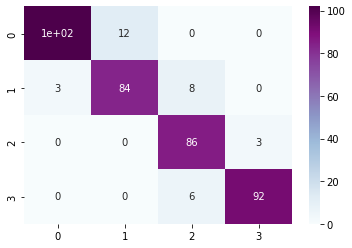

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_svm),cmap='BuPu',annot=True);

#Confusion matrix of DT

In [ ]:
confusion_matrix(y_test,optimum_DT_)

array([[77, 31,  6,  0],
       [11, 72, 11,  1],
       [ 1,  6, 65, 17],
       [ 0,  0, 18, 80]])

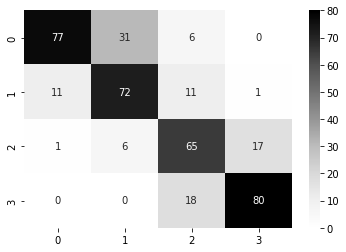

In [ ]:
sns.heatmap(confusion_matrix(y_test,optimum_DT_),cmap='Greys',annot=True);

#Confusion matrix of RF

In [ ]:
confusion_matrix(y_test,optimum_RF_)

array([[100,  14,   0,   0],
       [  3,  82,  10,   0],
       [  0,   4,  78,   7],
       [  0,   0,   5,  93]])

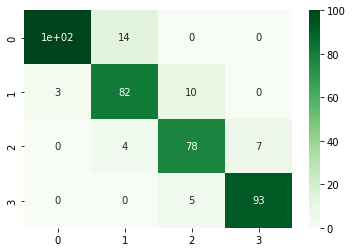

In [ ]:
sns.heatmap(confusion_matrix(y_test,optimum_RF_),cmap='Greens',annot=True);

#Confusion matrix of XG

In [ ]:
confusion_matrix(y_test,optimum_xg_)

array([[97, 17,  0,  0],
       [ 2, 80, 13,  0],
       [ 0,  2, 81,  6],
       [ 0,  0,  8, 90]])

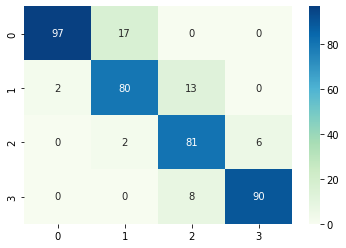

In [ ]:
sns.heatmap(confusion_matrix(y_test,optimum_xg_),cmap='GnBu',annot=True);

#Classification Report

In [ ]:
class_report_knn = classification_report(y_test,y_pred_er)
print(class_report_knn)
class_report_svm = classification_report(y_test,y_pred_svm)
print(class_report_svm)
class_report_DT = classification_report(y_test,optimum_DT_)
print(class_report_DT)
class_report_Rf = classification_report(y_test,optimum_RF_)
print(class_report_Rf)
class_report_xg = classification_report(y_test,optimum_xg_)
print(class_report_xg)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       114
           1       0.74      0.71      0.72        95
           2       0.63      0.78      0.70        89
           3       0.91      0.83      0.87        98

    accuracy                           0.80       396
   macro avg       0.81      0.80      0.80       396
weighted avg       0.82      0.80      0.81       396

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       114
           1       0.88      0.88      0.88        95
           2       0.86      0.97      0.91        89
           3       0.97      0.94      0.95        98

    accuracy                           0.92       396
   macro avg       0.92      0.92      0.92       396
weighted avg       0.92      0.92      0.92       396

              precision    recall  f1-score   support

           0       0.87      0.68      0.76       114
           1       0.

#Among all models svm is implemented with an accuracy of 97%